<a href="https://colab.research.google.com/github/AnjanaMS0217/Add-on-course/blob/main/homework_week3_day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

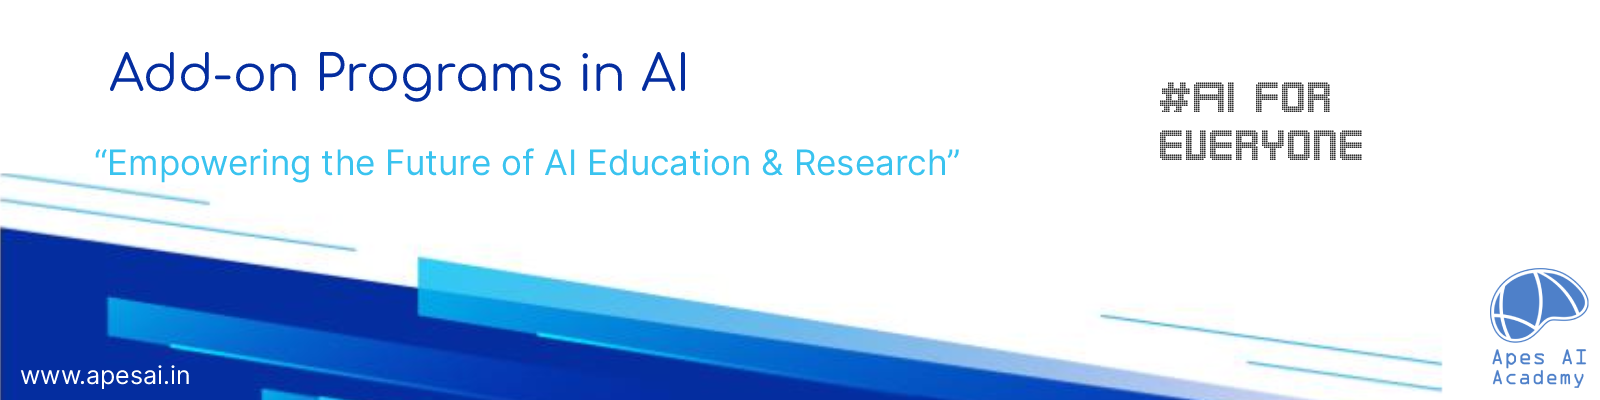

# Task



*   Load MNIST dataset (Hand written digits dataset)
*   Train DNN and experiment with different number of layers and neurons.
*  Now train the DNN with only two class from the dataset (A binary classifier using DNN)
* Apply Normalization to the image data and then train, and analyze the improvement.


**Search and find the code/solution and solve errors. Do not use any Copilot*



Load MNIST dataset (Hand written digits dataset)

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist = keras.datasets.mnist

Train DNN and experiment with different number of layers and neurons.

In [3]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

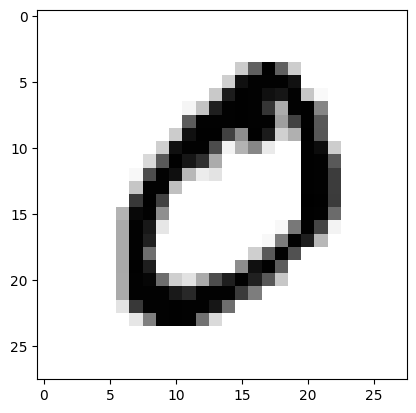

In [7]:
plt.imshow(x_train[1], cmap = 'binary')
plt.show()

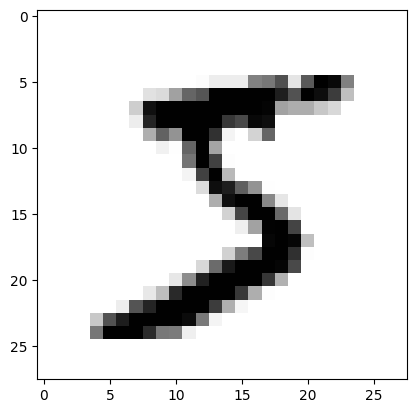

In [8]:
plt.imshow(x_train[0], cmap = 'binary')
plt.show()

In [9]:
y_train[1]

np.uint8(0)

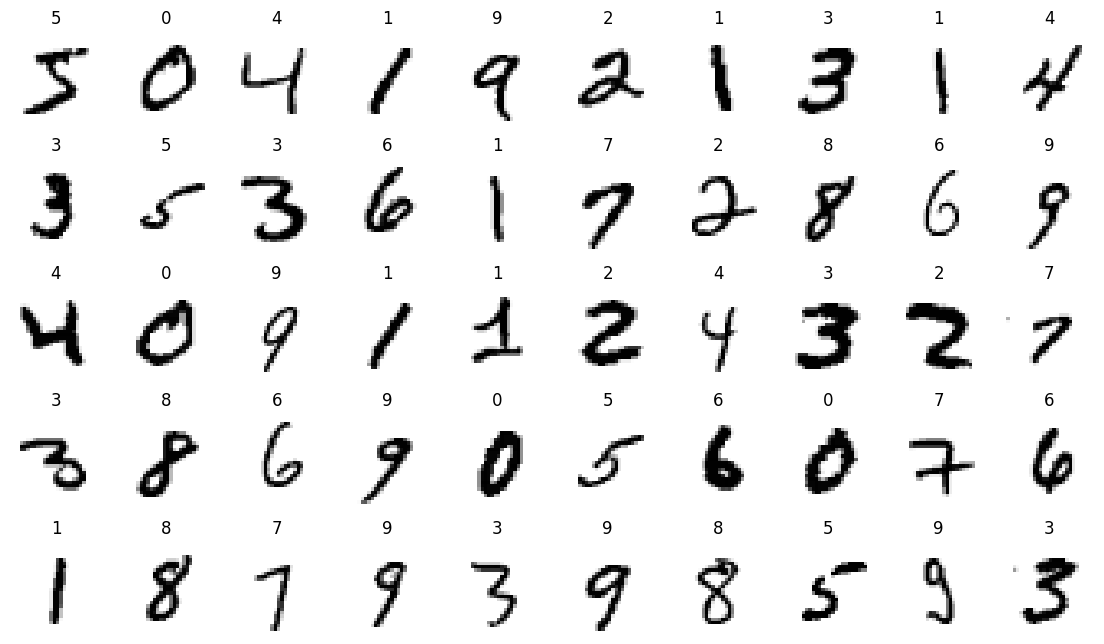

In [11]:
class_names = ['0','1','2','3','4','5','6','7','8','9']
n_rows = 5
n_cols = 10
plt.figure(figsize = (n_cols*1.4, n_rows*1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap = 'binary', interpolation = 'nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]])

In [12]:
DNN = keras.models.Sequential()
DNN.add(keras.layers.Flatten(input_shape = [28,28]))
DNN.add(keras.layers.Dense(600, activation = 'relu'))
DNN.add(keras.layers.Dense(300, activation = 'relu'))
DNN.add(keras.layers.Dense(100, activation = 'relu'))
DNN.add(keras.layers.Dense(10, activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
DNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 600)            │       471,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │       180,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 682,410 (2.60 MB)

 Trainable params: 682,410 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
DNN.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
tbCallBack = keras.callbacks.TensorBoard(log_dir = "tbGraph/")

In [16]:
history_DNN = DNN.fit(x_train, y_train, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8391 - loss: 3.2932 - val_accuracy: 0.9488 - val_loss: 0.1881
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9459 - loss: 0.2061 - val_accuracy: 0.9555 - val_loss: 0.1614
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9585 - loss: 0.1475 - val_accuracy: 0.9682 - val_loss: 0.1217
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9655 - loss: 0.1213 - val_accuracy: 0.9668 - val_loss: 0.1171
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9675 - loss: 0.1180 - val_accuracy: 0.9682 - val_loss: 0.1339
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9719 - loss: 0.1058 - val_accuracy: 0.9657 - val_loss: 0.1221
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9749 - loss: 0.0926 - val_accuracy: 0.9720 - val_loss: 0.1141
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9780 -

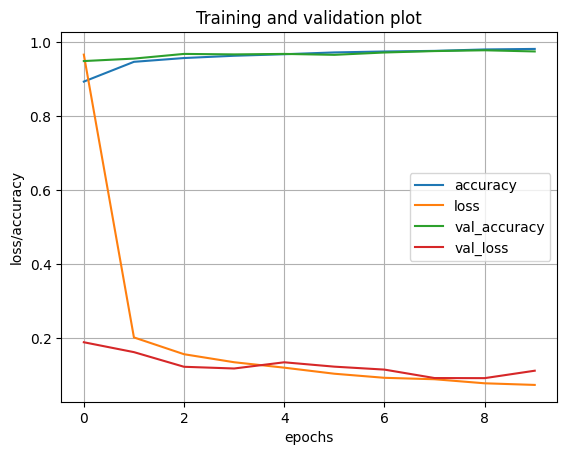

In [17]:
import pandas as pd
pd.DataFrame(history_DNN.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [19]:
test_loss, test_accuracy = DNN.evaluate(x_test, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9652 - loss: 0.1464
Test loss: 0.12623336911201477, Test accuracy: 0.9706000089645386


Now train the DNN with only two class from the dataset (A binary classifier using DNN)



In [20]:
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

In [21]:
x_train_bin, y_train_bin = x_train[train_filter], y_train[train_filter]
x_test_bin, y_test_bin = x_test[test_filter], y_test[test_filter]

In [22]:
y_train_bin = (y_train_bin == 1).astype(int)
y_test_bin = (y_test_bin == 1).astype(int)

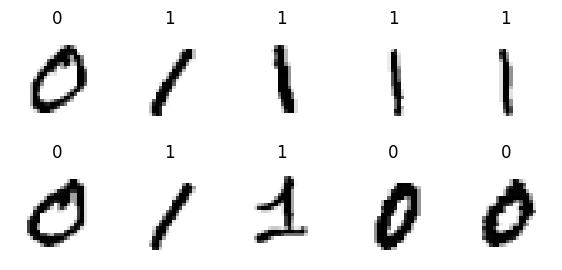

In [26]:
class_names = ['0','1']
n_rows=2
n_cols=5
plt.figure(figsize = (n_cols*1.4, n_rows*1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train_bin[index], cmap = 'binary', interpolation = 'nearest')
        plt.axis('off')
        plt.title(class_names[y_train_bin[index]])

In [27]:
DNN_bin = keras.models.Sequential()
DNN_bin.add(keras.layers.Flatten(input_shape = [28,28]))
DNN_bin.add(keras.layers.Dense(300, activation = 'relu'))
DNN_bin.add(keras.layers.Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
DNN_bin.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history_DNN_bin=DNN_bin.fit(x_train_bin, y_train_bin, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9834 - loss: 0.8499 - val_accuracy: 0.9992 - val_loss: 0.0080
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9976 - loss: 0.3093 - val_accuracy: 1.0000 - val_loss: 5.2455e-27
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9988 - loss: 0.1536 - val_accuracy: 1.0000 - val_loss: 3.3349e-28
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9994 - loss: 0.0289 - val_accuracy: 1.0000 - val_loss: 4.7379e-35
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9995 - loss: 0.0224 - val_accuracy: 1.0000 - val_loss: 2.1018e-19
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9993 - loss: 0.0456 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9996 - loss: 0.0876 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9994 - loss: 0

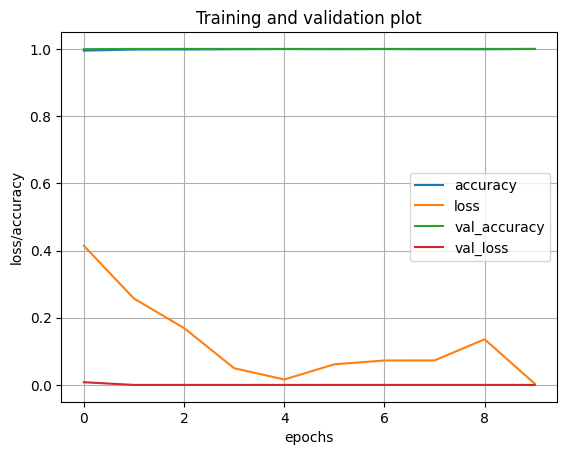

In [31]:
import pandas as pd
pd.DataFrame(history_DNN_bin.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [32]:
test_loss_bin, test_accuracy_bin = DNN_bin.evaluate(x_test_bin, y_test_bin)
print("Test loss: {}, Test accuracy: {}".format(test_loss_bin, test_accuracy_bin))

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0097    
Test loss: 0.13107238709926605, Test accuracy: 0.9995272159576416


Apply Normalization to the image data and then train, and analyze the improvement.

In [40]:
x_mean=x_train.mean()
x_std=x_train.std()
x_train_norm=(x_train - x_mean)/(x_std)
x_test_norm=(x_test - x_mean)/(x_std)

In [41]:
DNN_norm = keras.models.Sequential()
DNN_norm.add(keras.layers.Flatten(input_shape = [28,28]))
DNN_norm.add(keras.layers.Dense(600, activation = 'relu'))
DNN_norm.add(keras.layers.Dense(300, activation = 'relu'))
DNN_norm.add(keras.layers.Dense(100, activation = 'relu'))
DNN_norm.add(keras.layers.Dense(10, activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
DNN_norm.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [43]:
history_DNN_norm = DNN_norm.fit(x_train_norm, y_train, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8939 - loss: 0.3374 - val_accuracy: 0.9682 - val_loss: 0.1070
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9670 - loss: 0.1088 - val_accuracy: 0.9748 - val_loss: 0.0848
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9768 - loss: 0.0728 - val_accuracy: 0.9765 - val_loss: 0.0866
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9821 - loss: 0.0583 - val_accuracy: 0.9775 - val_loss: 0.0733
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9870 - loss: 0.0422 - val_accuracy: 0.9772 - val_loss: 0.0855
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.9866 - loss: 0.0436 - val_accuracy: 0.9742 - val_loss: 0.0945
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9893 - loss: 0.0344 - val_accuracy: 0.9698 - val_loss: 0.1131
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9904 -

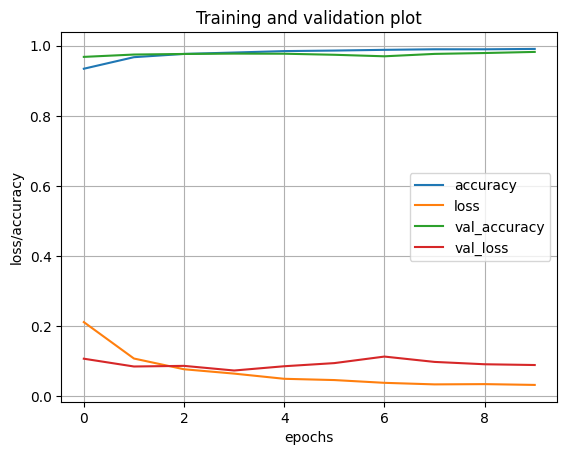

In [44]:
import pandas as pd
pd.DataFrame(history_DNN_norm.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [45]:
test_loss, test_accuracy = DNN_norm.evaluate(x_test_norm, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9741 - loss: 0.1192
Test loss: 0.09301600605249405, Test accuracy: 0.9789000153541565
